In [1]:
import os
import json

ROOT_DIR = '../data'

COCO_FILE = 'coco.json'
PANOPTIC_FILE = 'panoptic.json'

AAC_PANOPTIC_FILE = 'aac_panoptic.json'

VAL_COCO_FILE = 'val_coco.json'
VAL_PANOPTIC_FILE = 'val_panoptic.json'

AAC_VAL_PANOPTIC_FILE = 'aac_val_panoptic.json'

## Read Validation json file
with open(os.path.join(ROOT_DIR, VAL_PANOPTIC_FILE), "r") as val_panoptic_file:
    val_panoptic_data = json.load(val_panoptic_file)

## Print Original Image and its Original Mask

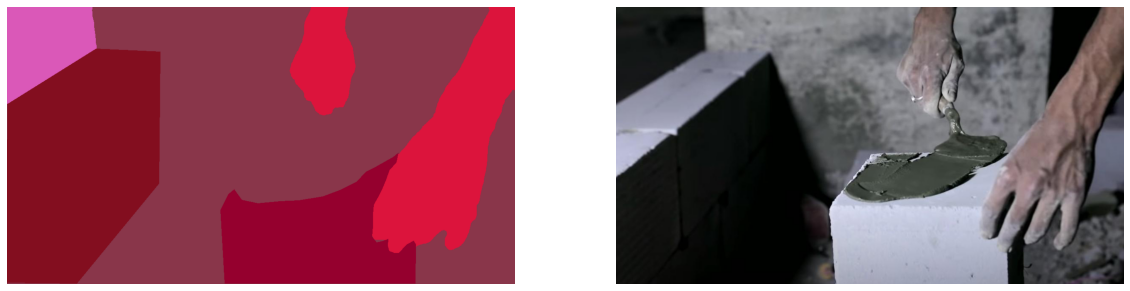

In [2]:
# import itertools
# import seaborn as sns
# import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
# from panopticapi.utils import rgb2id

# palette = itertools.cycle(sns.color_palette())

name = 'aac_blocks_2385'

# The segmentation is stored in a special-format png
# panoptic_seg = Image.open(f"../data/val_panoptic/{name}.png")
# img = Image.open(f"../data/images/{name}.jpg")

# panoptic_seg = np.array(panoptic_seg, dtype=np.uint8).copy()
# # We retrieve the ids corresponding to each mask
# panoptic_seg_id = rgb2id(panoptic_seg)

# print("Unique Values:", np.unique(panoptic_seg_id))

# # Finally we color each mask individually
# panoptic_seg[:, :, :] = 0
# for id in range(panoptic_seg_id.max() + 1):
#     panoptic_seg[panoptic_seg_id == id] = np.asarray(next(palette)) * 255

_, axarr = plt.subplots(1,2, figsize=(20,10))
axarr[0].imshow(Image.open(f"../data/val_panoptic/{name}.png"))
axarr[0].axis('off')
axarr[1].imshow(Image.open(f"../data/images/{name}.jpg"))
axarr[1].axis('off')
plt.show()

# import cv2
# cv2.imwrite('masks.png', panoptic_seg)

## Print Predicted Mask and Original Image

aac_blocks_2273.jpg : [0 1 2]


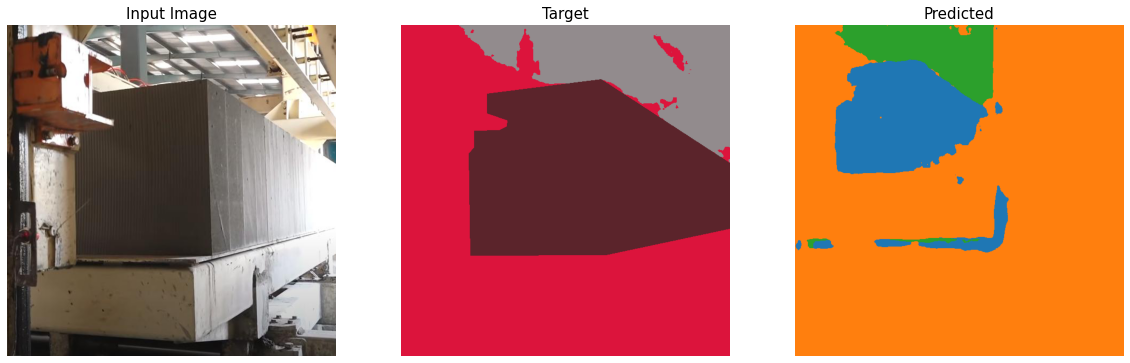

In [23]:
import itertools
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from panopticapi.utils import rgb2id

palette = itertools.cycle(sns.color_palette())

iid = 2273
imx = next(x for x in val_panoptic_data['images'] if x['id'] == iid)
name = f'{iid:012d}'

# # The segmentation is stored in a special-format png
panoptic_seg = Image.open(f"../data/outputs/segmentations/output_all_masks_freezed_150_28_09_2021/panoptic_eval/{name}.png")

panoptic_seg = np.array(panoptic_seg, dtype=np.uint8).copy()
# We retrieve the ids corresponding to each mask
panoptic_seg_id = rgb2id(panoptic_seg)

print(f"{imx['file_name']} : {np.unique(panoptic_seg_id)}")
# print(np.unique(panoptic_seg_id))

# Finally we color each mask individually
panoptic_seg[:, :, :] = 0
for id in range(panoptic_seg_id.max() + 1):
    panoptic_seg[panoptic_seg_id == id] = np.asarray(next(palette)) * 255


_, axarr = plt.subplots(1,3, figsize=(20,10))

axarr[0].imshow(Image.open(f"../data/images/{imx['file_name']}"))
axarr[0].set_title('Input Image', {'fontsize': 15})
axarr[0].axis('off')
axarr[1].imshow(Image.open(f"../data/val_panoptic/{imx['file_name'].split('.')[0]}.png"))
axarr[1].set_title('Target', {'fontsize': 15})
axarr[1].axis('off')
axarr[2].imshow(panoptic_seg)
axarr[2].axis('off')
axarr[2].set_title('Predicted', {'fontsize': 15})

plt.savefig(f"../data/predictions/{imx['file_name'].split('.')[0]}.png", bbox_inches='tight')

plt.show()

# plt.figure(figsize=(10,10))
# plt.imshow(panoptic_seg)
# plt.axis('off')

# img = Image.open(f"../data/images/{imx['file_name']}")

# plt.figure(figsize=(10,10))
# plt.imshow(img)
# plt.axis('off')
# plt.show()

# import cv2
# cv2.imwrite('masks.png', panoptic_seg)